# Level 4 Python
--------------|-------|
|Danylo Zdoryk| 233305|
|Dmytro Shelest| 226453|
|Gracjan Grala| 210192|
|Jan Kisielewicz| 210221|



---
## Importing libraries

In [71]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
import seaborn as sns

import tkinter as tk


---
## Reading data and creating data frame using pandas

In [72]:
df = pd.read_csv("D:\Projects\data-processing-with-python\\athlete_events.csv")
# Showing columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


---
# Exercises
---


---
## Exercise 1. Prepare a summary of the total number of competitors at the Summer and Winter Olympics in the following years.
---

In [73]:
participants_1 = df[['Year', 'Season' , 'ID']].groupby(['Year', 'Season']).count().reset_index().rename(columns={"ID":"Amount"})
participants_1

,Year,Season,Amount
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


---
## Visualization 1.1
---

C:\Users\nicez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


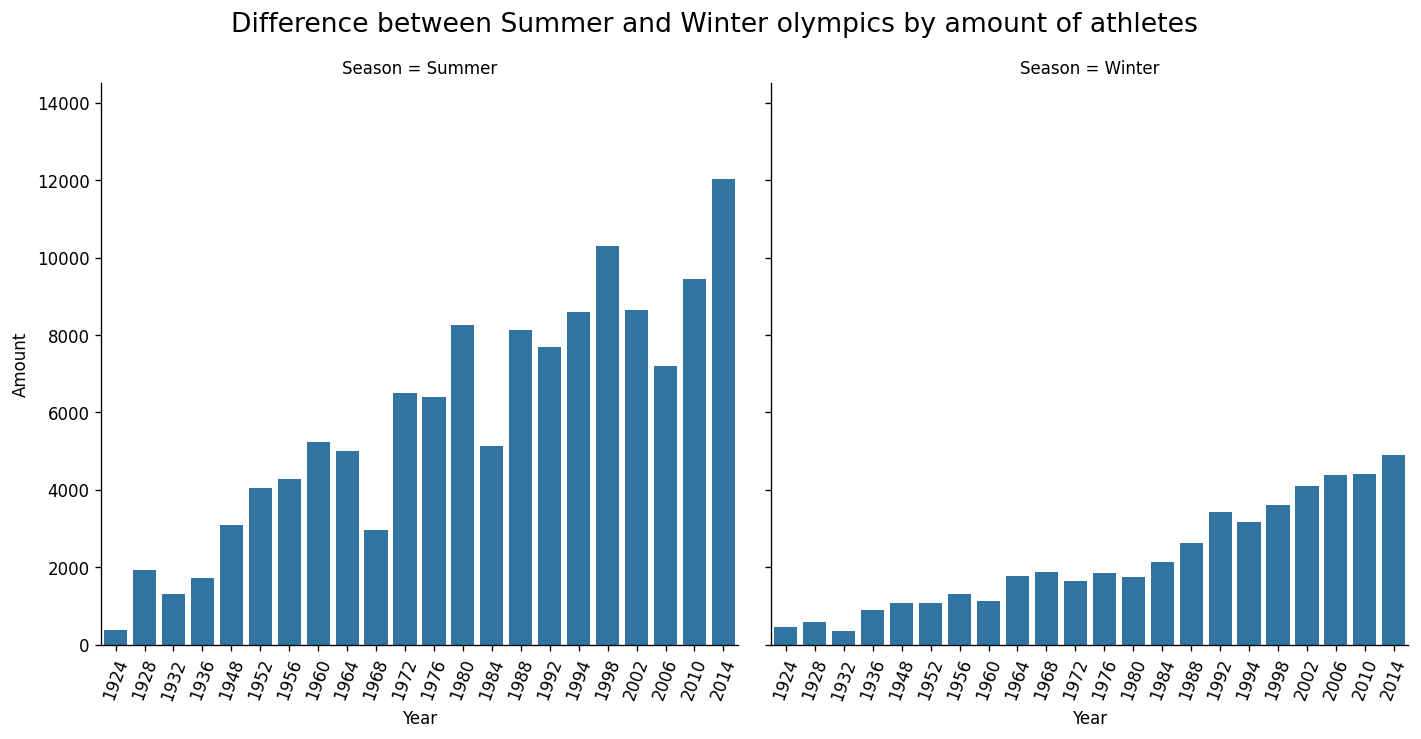

In [74]:
g = sns.FacetGrid(participants_1, col="Season")
g.fig.set_dpi(120)
g.fig.suptitle('Difference between Summer and Winter olympics by amount of athletes', fontsize=16)
g.fig.set_size_inches(12,6)
g.map(sns.barplot, "Year", "Amount")
g.set_xticklabels(rotation=70)
plt.show()

---
## Visualization 1.2
---

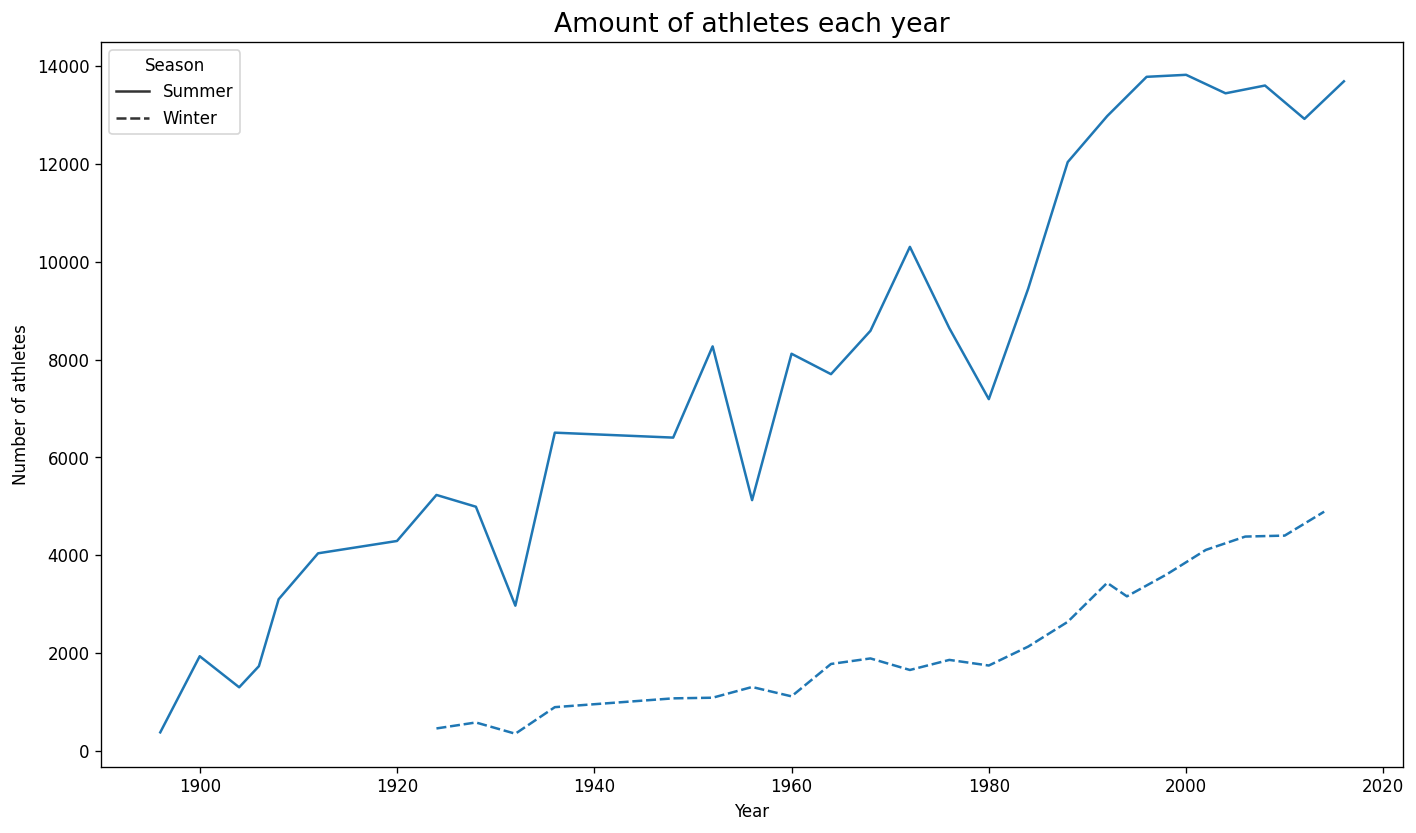

In [75]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Amount of athletes each year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.lineplot(x=participants_1.Year, y=participants_1.Amount, style=participants_1.Season)
plt.show()

---
## Exercise 2. Prepare a table showing the average number of women and men competing in the Summer Olympics for each National Olympic Committee.
---

In [76]:
gender_amount = df[df.Season == 'Summer'].groupby(['NOC','Sex','Year']).size().reset_index().rename(columns={0:"Amount"})
pd.set_option("display.precision", 3)
result_2 = gender_amount.drop('Year', axis=1).groupby(['NOC', 'Sex']).mean().reset_index()
result_2

,NOC,Sex,Amount
0,AFG,F,1.250
1,AFG,M,8.643
2,AHO,F,2.400
3,AHO,M,4.769
4,ALB,F,3.125
...,...,...,...
447,YUG,M,109.312
448,ZAM,F,2.111
449,ZAM,M,12.615
450,ZIM,F,9.417


---
## Visualization 1
---

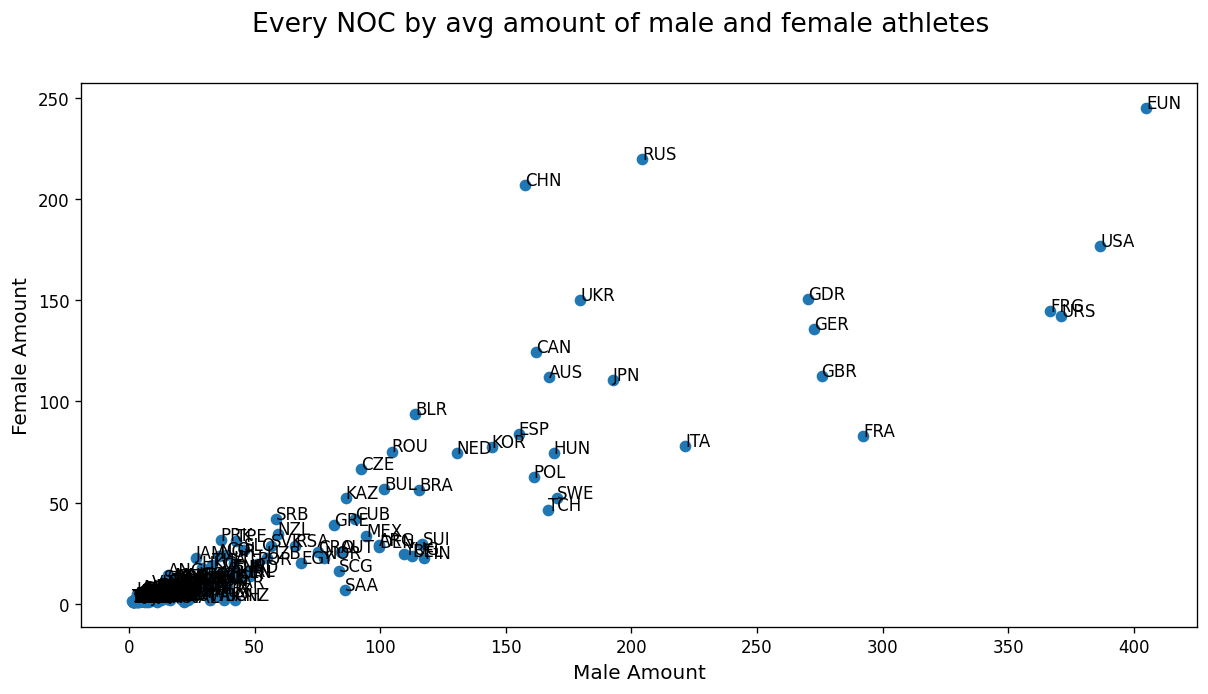

In [77]:
temp = result_2[['NOC', 'Sex']].groupby(["NOC"]).sum().reset_index()
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)]
male = temp[temp['Sex'] == 'M'].reset_index()
female = temp[temp['Sex'] == 'F'].reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.suptitle('Every NOC by avg amount of male and female athletes', fontsize=16)
ax.set_xlabel('Male Amount', fontsize=12)
ax.set_ylabel('Female Amount', fontsize=12)
plt.scatter(male.Amount, female.Amount)

for i in range(len(male)):
    plt.annotate(male.loc[i, 'NOC'], (male.loc[i, 'Amount'], female.loc[i, 'Amount']))

---
## Visualization 2
---

## Data preparation

In [80]:
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)].reset_index()
summary = temp.groupby(['NOC']).sum()
new_sum = pd.DataFrame(np.repeat(summary.values, 2, axis=0), columns=summary.columns)

# print(new_sum)
temp['AVG'] = temp.Amount / new_sum.Amount * 100
female = temp[temp.Sex == 'F'].reset_index()
male = temp[temp.Sex == 'M'].reset_index()
delta = np.abs(female.AVG - male.AVG)
counter = 0
for i in range(len(delta)):
    for j in range(2):
        temp.loc[counter, 'Delta'] = delta.loc[i]
        counter += 1

worst = temp.sort_values(by=['Delta'], ascending=False).head(30)
best = temp.sort_values(by=['Delta']).head(30)



## Visualization

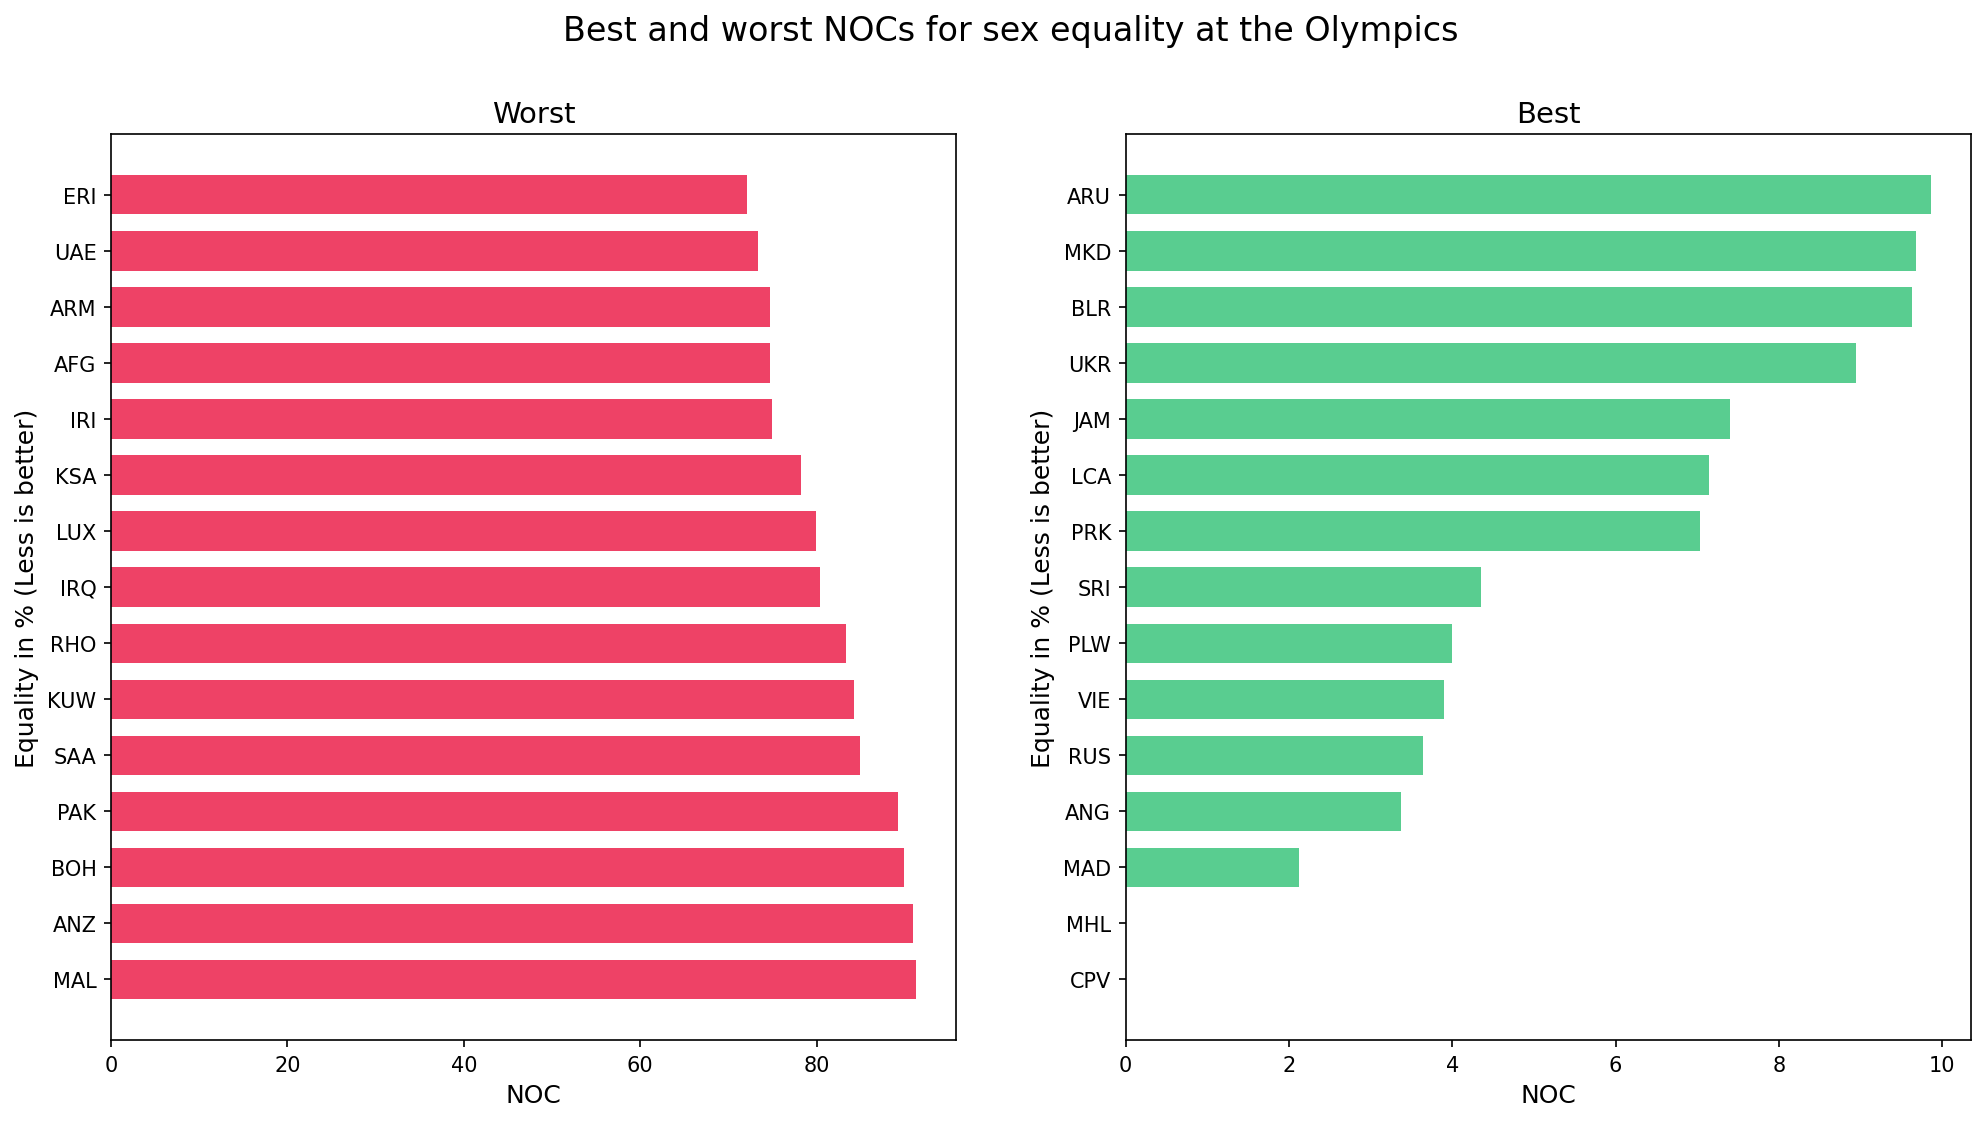

In [81]:
width = 0.7

fig, axs = plt.subplots(1,2)

axs[0].barh(worst.NOC, worst.Delta, width, label='Worst', align='center', color='#EE4266')

axs[1].barh(best.NOC, best.Delta, width, label='Best', align='center', color='#59CD90')

fig.set_size_inches(16,8)
fig.set_dpi(150)
axs[0].set_title('Worst', fontsize=14)
axs[0].set_xlabel('NOC', fontsize=12)
axs[0].set_ylabel('Equality in % (Less is better)', fontsize=12)

axs[1].set_title('Best', fontsize=14)
axs[1].set_xlabel('NOC', fontsize=12)
axs[1].set_ylabel('Equality in % (Less is better)', fontsize=12)
# fig.legend(['Worst', 'Best'])
fig.suptitle('Best and worst NOCs for sex equality at the Olympics', fontsize=16)
plt.show()


---
## 1.3 Prepare a list of the 5 National Olympic Committees that put together the largest number of different competitors and the number of their competitors depending on the number of Olympics in which the competitor participated.
---

In [82]:
unique = df.drop_duplicates(subset='Name').groupby('NOC').value_counts().groupby('NOC').sum().reset_index()
# Best committees with every athlete and athlete number of participation
best_committees = df[df.NOC.isin(unique.sort_values(by=[0], ascending=False).head(5).NOC)].groupby(['NOC','Name']).value_counts().groupby(['NOC','Name']).sum()
temp = best_committees.reset_index().rename(columns={0:'Number of participations'})
temp['Name'] = 1
result_3 = temp.groupby(['NOC', 'Number of participations']).sum().rename(columns={'Name':'Amount of athletes'})
result_3

Amount of athletes
NOC Number of participations                    
AUS 1                                        529
    2                                        145
    3                                         57
    4                                         25
    5                                          7
    6                                          3
    7                                          3
    8                                          3
    9                                          2
CAN 1                                        606
    2                                        120
    3                                         36
    4                                         16
    5                                          6
    6                                          2
GER 1                                        766
    2                                        176
    3                                         68
    4                                         36
    5                                         10
    6                                          2
    7                                          2
    8                                          4
    9                                          2
    10                                         2
URS 1                                       1042
    2                                        289
    3                                         84
    4                                         38
    5                                         11
    6                                          7
    7                                          1
    8                                          2
    9                                          4
    10                                         2
    13                                         1
    15                                         1
    18                                         1
USA 1                                       2089
    2                                        495
    3                                        163
    4                                         85
    5                                         27
    6                                         17
    7                                          5
    8                                          6
    9                                          3
    10                                         3
    11                                         2
    12                                         4
    28                                         1

---
## Visualization 1
---


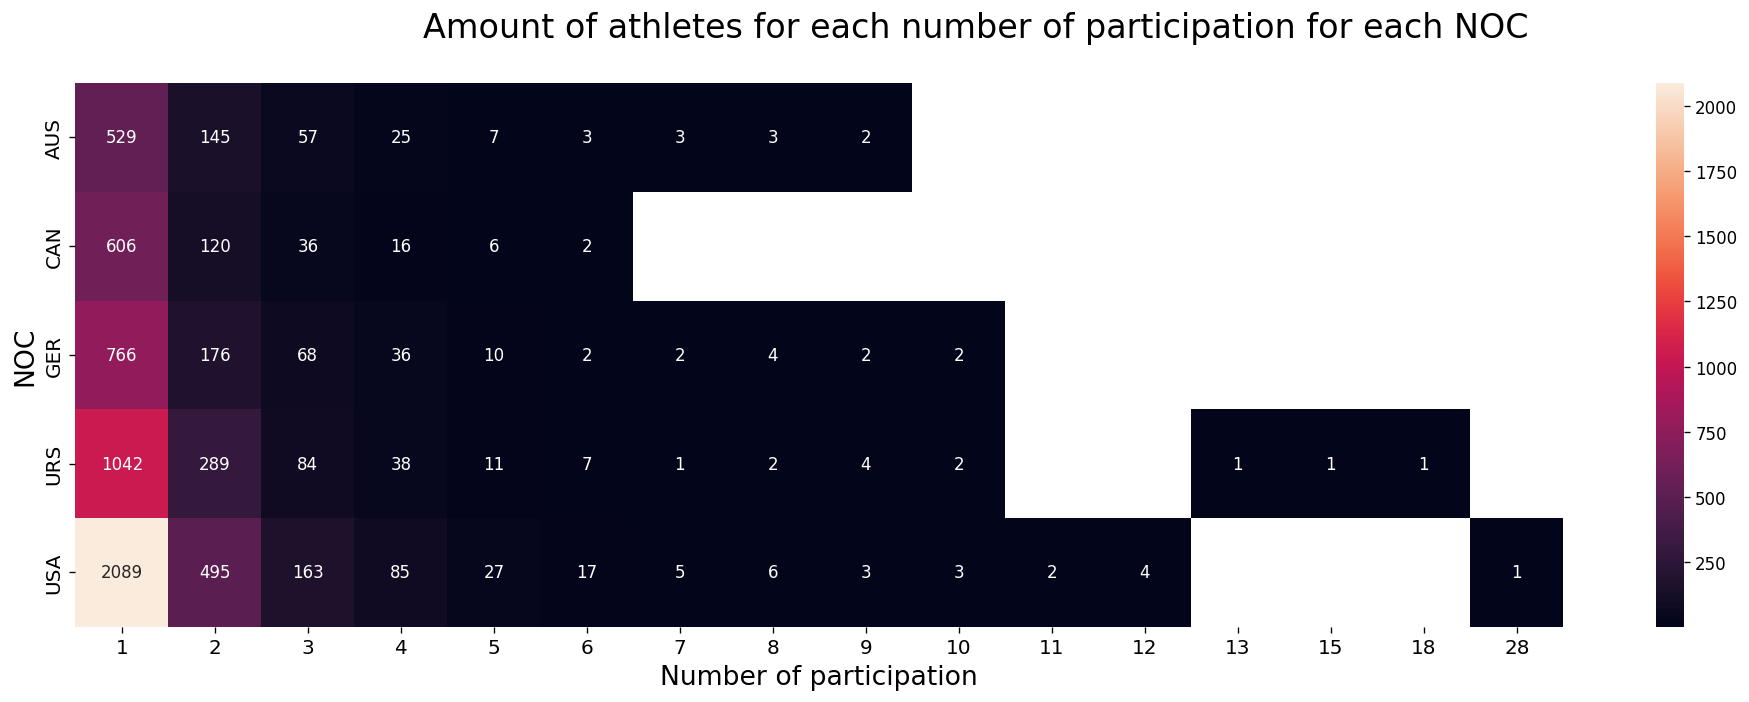

In [83]:
fig, ax = plt.subplots(figsize=(20,6), dpi=120)
fig.suptitle('Amount of athletes for each number of participation for each NOC', fontsize=20)
res = sns.heatmap(result_3.reset_index().pivot(index='NOC', columns='Number of participations', values='Amount of athletes'), annot=True, fmt='g')
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 12)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 12)
plt.xlabel('Number of participation', size=16)
plt.ylabel('NOC', size=16)
plt.show()

---
## Visualization 2
---

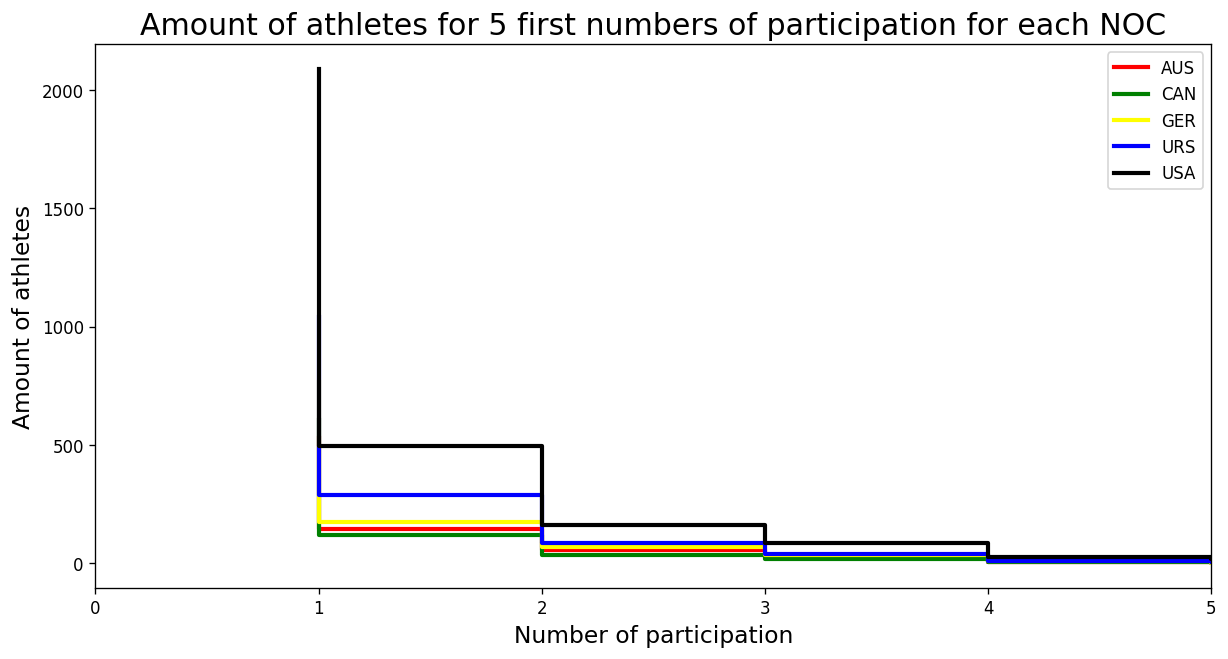

In [84]:

temp = result_3.reset_index()
NOC = temp.drop_duplicates(subset='NOC').NOC.reset_index()

fig, axi = plt.subplots()
fig.set_figwidth(12)
fig.set_figheight(6)
fig.set_dpi(120)

axi.set_xlabel('Number of participation', fontsize=14)
axi.set_ylabel('Amount of athletes', fontsize=14)

plt.title('Amount of athletes for 5 first numbers of participation for each NOC', fontsize=18)


colors = ['red', 'green', 'yellow', 'blue', 'black']


for i in range(5):
    axi.step(temp[temp['NOC'] == temp.loc[NOC.loc[i, 'index'], 'NOC']]['Number of participations'], temp[temp['NOC'] == temp.loc[NOC.loc[i, 'index'], 'NOC']]['Amount of athletes'], linewidth=2.5, color=colors[i], label=NOC.loc[i, 'NOC'])

axi.legend()

plt.xlim(xmin=0,xmax=5)

plt.show()


---
# Interaction
---


---
## Plot 1
---

In [ ]:
from PIL import ImageTk, Image
from time import sleep

root = tk.Tk()
root.title('Plot 1')
root.geometry("1200x800")

# plot1_title
plot1_title = tk.Label(
    root,
    text="Plot 1",
    fg="#262F56",
    font=("Futura Hv BT", 30)
)

plot1_title.pack(
    ipady=20,
    fill='x'
)

# Plot functions

def plot(start=1896, end=2014):
    plt.figure(figsize=(12,6), dpi=100)
    plt.title('Amount of athletes each year', fontsize=16)
    plt.xlabel('Year')
    plt.ylabel('Number of athletes')
    sns.lineplot(x=participants_1[(participants_1.Year >= start) & (participants_1.Year <= end)].Year, y=participants_1.Amount, style=participants_1.Season)
    plt.savefig('plot_1.png')


def generate_new_plot():
    global plot1_plot, plot1_plot_frame
    start, end = int(plot1_start_date.get(1.0, "end-1c")), int(plot1_end_date.get(1.0, "end-1c"))
    plot(start=start, end=end)
    sleep(1.5)
    image = ImageTk.PhotoImage(Image.open("plot_1.png"))
    plot1_plot.configure(image=image)

# Entry frame

plot1_entry_frame = tk.Frame(root)

plot1_start_year_label = tk.Label(
    plot1_entry_frame,
    text="Start Year",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot1_end_year_label = tk.Label(
    plot1_entry_frame,
    text="End Year",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot1_start_date = tk.Text(plot1_entry_frame, height=1, width=15, font=("Futura Hv BT", 20), fg="#262F56")
plot1_end_date = tk.Text(plot1_entry_frame, height=1, width=15, font=("Futura Hv BT", 20), fg="#262F56")
plot1_button = tk.Button(plot1_entry_frame, text='Go!', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=generate_new_plot)
plot1_start_year_label.grid(row=0, column=0)
plot1_end_year_label.grid(row=0, column=2, padx=15)
plot1_start_date.grid(row=1, column=0)
plot1_end_date.grid(row=1, column=2, padx=15)
plot1_button.grid(row=1, column=3)

plot1_entry_frame.pack()

# PLot frame

plot1_plot_frame = tk.Frame(root, pady=20)
plot()

img = ImageTk.PhotoImage(Image.open("plot_1.png"))
plot1_plot = tk.Label(plot1_plot_frame, image = img)
plot1_plot.pack()

plot1_plot_frame.pack(fill='x')


root.mainloop()

---
# Plot 2
---

444


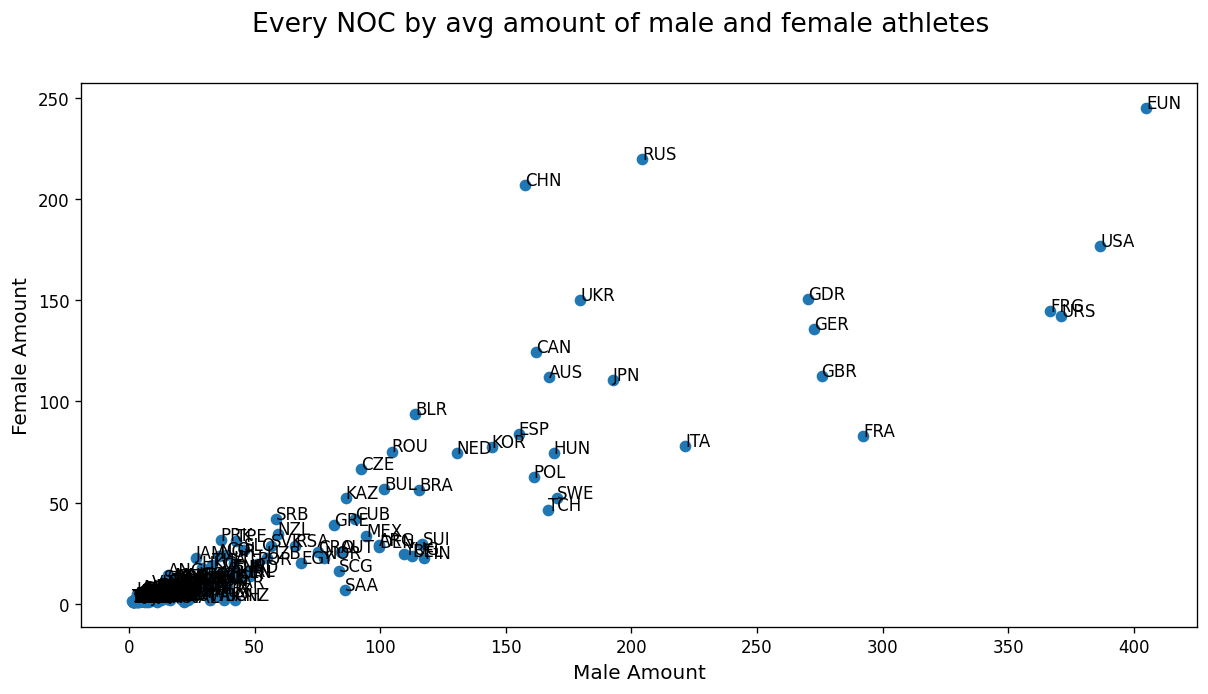

In [93]:
from PIL import ImageTk, Image
from time import sleep

zoom = 0

root = tk.Tk()
root.title('Plot 2')
root.geometry("1200x800")

# plot1_title
plot2_title = tk.Label(
    root,
    text="Plot 2",
    fg="#262F56",
    font=("Futura Hv BT", 30)
)

plot2_title.pack(
    ipady=20,
    fill='x'
)

# Plot functions

def plot(men, women, is_zoom_in = False):
    global zoom
    fig, ax = plt.subplots()
    fig.set_size_inches(12,6)
    fig.set_dpi(120)
    fig.suptitle('Every NOC by avg amount of male and female athletes', fontsize=16)
    ax.set_xlabel('Male Amount', fontsize=12)
    ax.set_ylabel('Female Amount', fontsize=12)
    plt.scatter(men.Amount, women.Amount)
    for i in range(len(men)):
        plt.annotate(men.loc[i, 'NOC'], (men.loc[i, 'Amount'], women.loc[i, 'Amount']))

    if is_zoom_in:
        zoom += 1
        plt.xlim(xmin=0,xmax=60/zoom)
        plt.ylim(ymin=0,ymax=45/zoom)

    plt.savefig('plot_2.png')


def generate_top_10():
    global plot2_zoom_in_button
    top = temp[temp.NOC.isin(temp.groupby(["NOC"]).sum().reset_index().sort_values(by="Amount", ascending=False).head(10).NOC)]
    plot2_zoom_in_button = tk.DISABLED
    generate_new_plot(top)

def generate_top_20():
    global plot2_zoom_in_button
    top = temp[temp.NOC.isin(temp.groupby(["NOC"]).sum().reset_index().sort_values(by="Amount", ascending=False).head(20).NOC)]
    plot2_zoom_in_button = tk.DISABLED
    generate_new_plot(top)

def generate_default():
    global zoom, plot2_zoom_in_button
    zoom = 0
    plot2_top10_button['state'], plot2_top20_button['state'] = tk.NORMAL, tk.NORMAL
    plot2_zoom_in_button = tk.NORMAL
    generate_new_plot(temp)

def generate_new_plot(data, is_zoom_in=False):
    global plot2_plot, plot2_plot_frame
    men = data[data['Sex'] == 'M'].reset_index()
    women = data[data['Sex'] == 'F'].reset_index()
    plot(men, women, is_zoom_in)
    sleep(1.5)
    image = ImageTk.PhotoImage(Image.open("plot_2.png"))
    plot2_plot.configure(image=image)


def zoom_in():
    generate_new_plot(data=temp, is_zoom_in=True)
    plot2_top10_button['state'], plot2_top20_button['state'] = tk.DISABLED, tk.DISABLED


# Entry frame

plot2_entry_frame = tk.Frame(root)

plot2_start_year_label = tk.Label(
    plot2_entry_frame,
    text="Start Year",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot2_end_year_label = tk.Label(
    plot2_entry_frame,
    text="End Year",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot2_zoom_in_button = tk.Button(plot2_entry_frame, text='Zoom in', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=zoom_in)
plot2_top10_button = tk.Button(plot2_entry_frame, text='Top 10', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=generate_top_10)
plot2_top20_button = tk.Button(plot2_entry_frame, text='Top 20', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=generate_top_20)
plot2_to_default_button = tk.Button(plot2_entry_frame, text='Default', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=generate_default)


plot2_top10_button.grid(row=1, column=0)
plot2_top20_button.grid(row=1, column=2, padx=15)
plot2_to_default_button.grid(row=1, column=3)
plot2_zoom_in_button.grid(row=1, column=4, padx=15)


plot2_entry_frame.pack()

# PLot frame

plot2_plot_frame = tk.Frame(root, pady=20)

temp = result_2[['NOC', 'Sex']].groupby(["NOC"]).sum().reset_index()
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)]
male = temp[temp['Sex'] == 'M'].reset_index()
female = temp[temp['Sex'] == 'F'].reset_index()

plot(male, female)

img = ImageTk.PhotoImage(Image.open("plot_2.png"))
plot2_plot = tk.Label(plot2_plot_frame, image = img)
plot2_plot.pack()

plot2_plot_frame.pack(fill='x')

print(len(temp))

root.mainloop()

---
# Plot 3
---

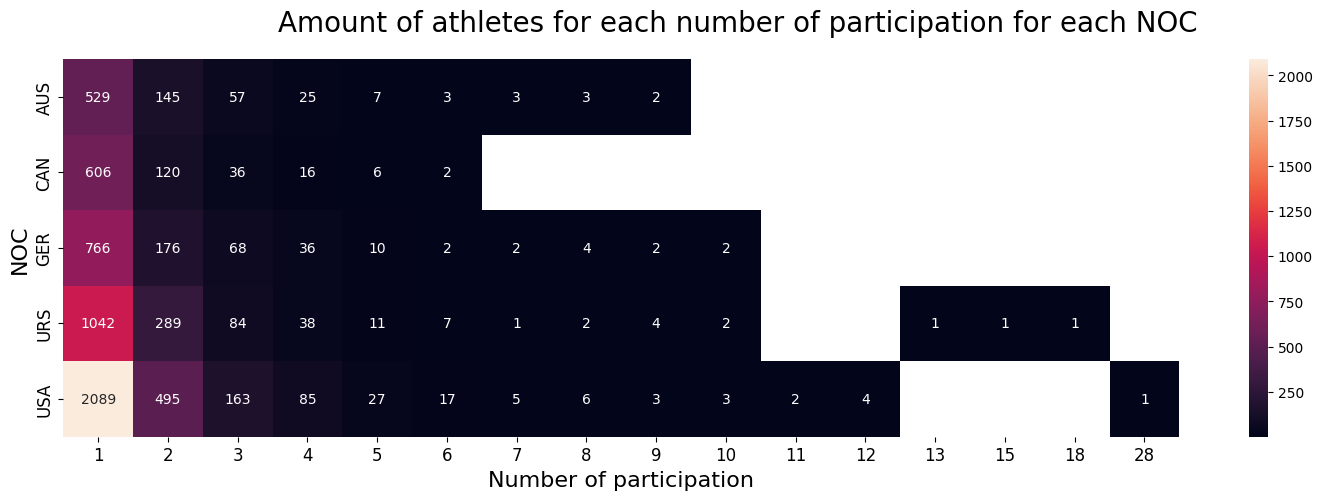

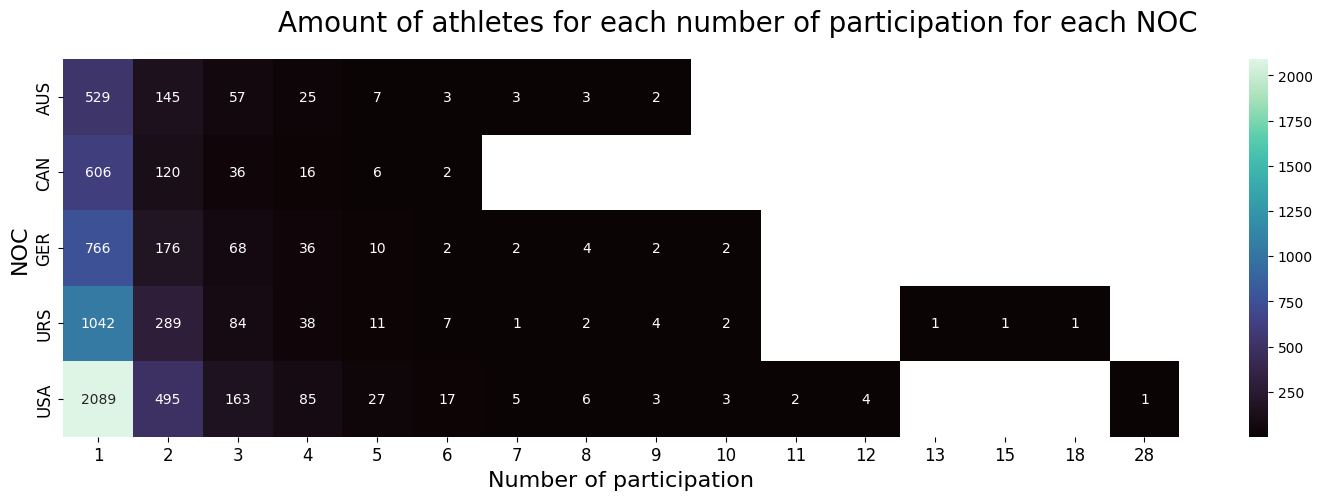

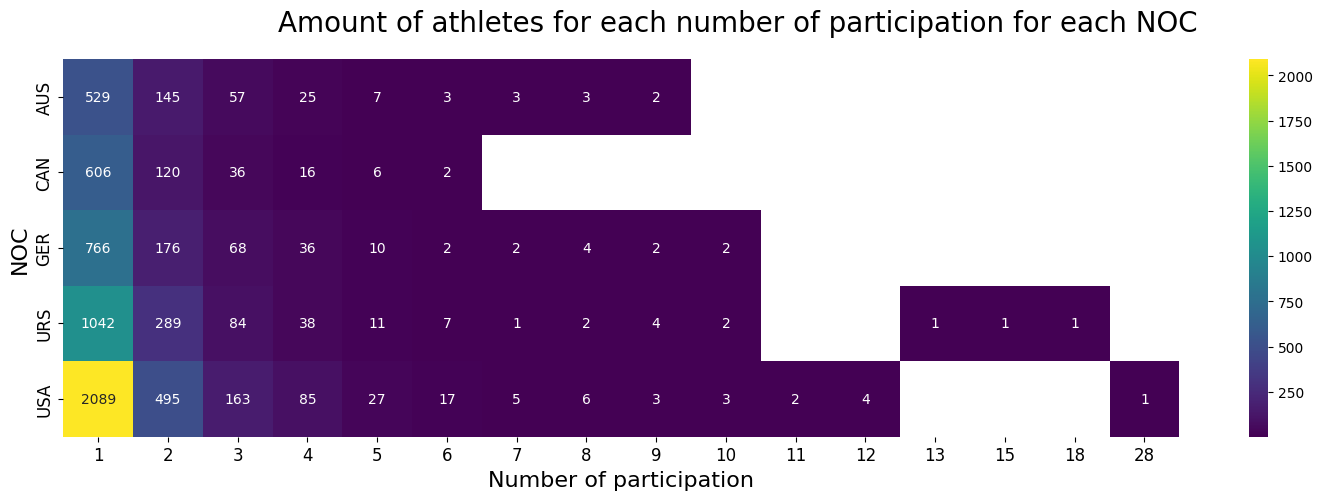

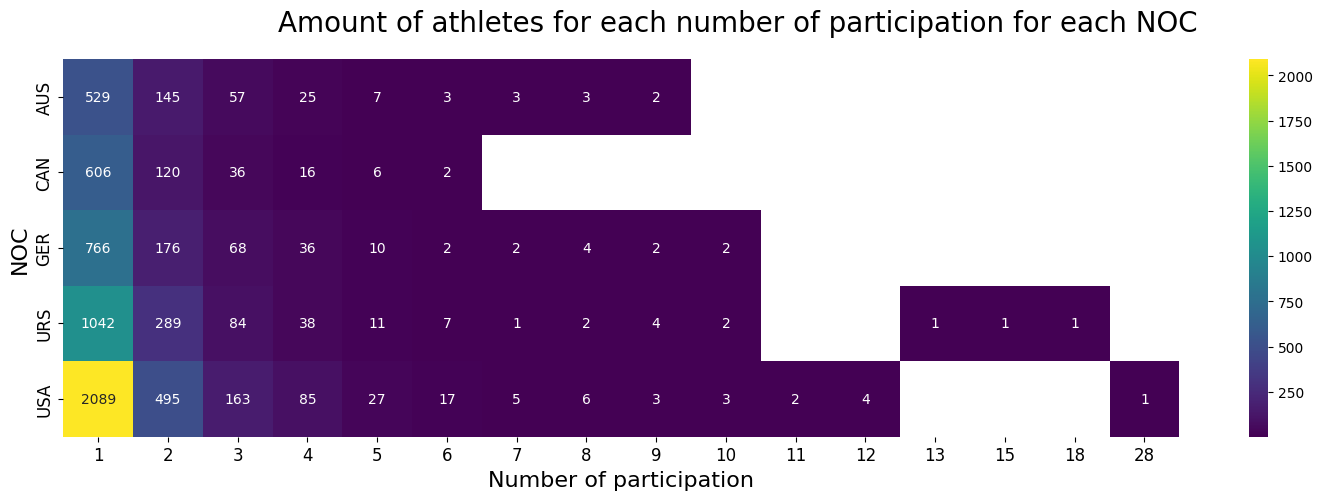

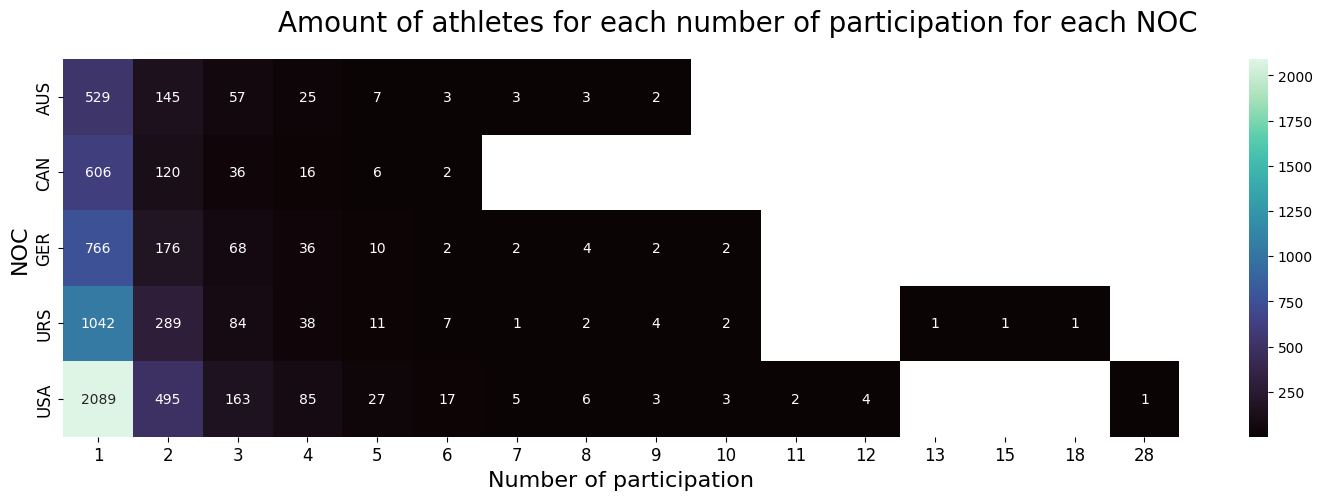

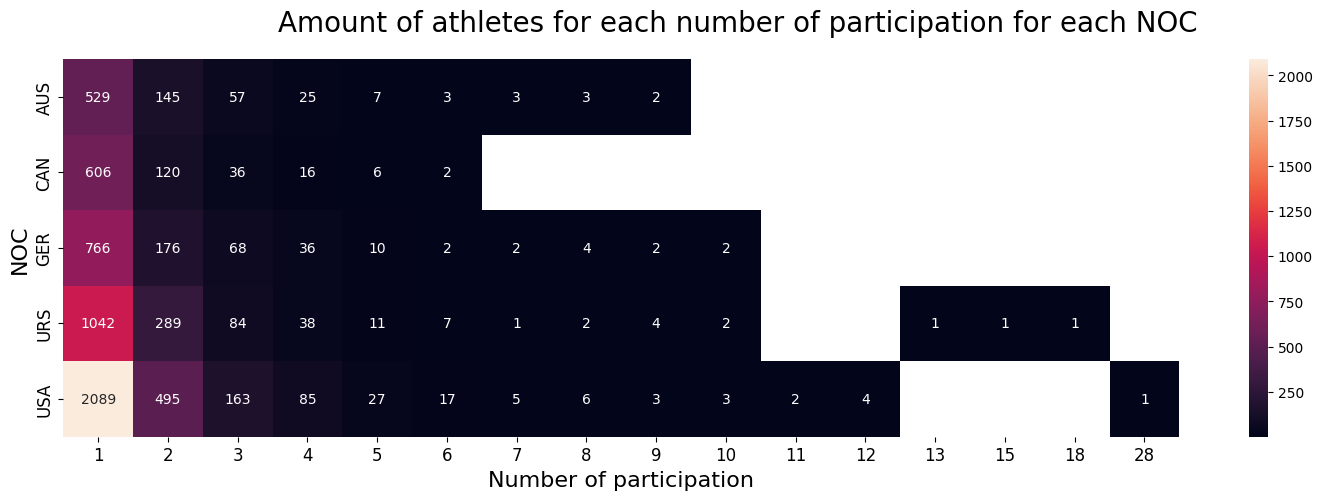

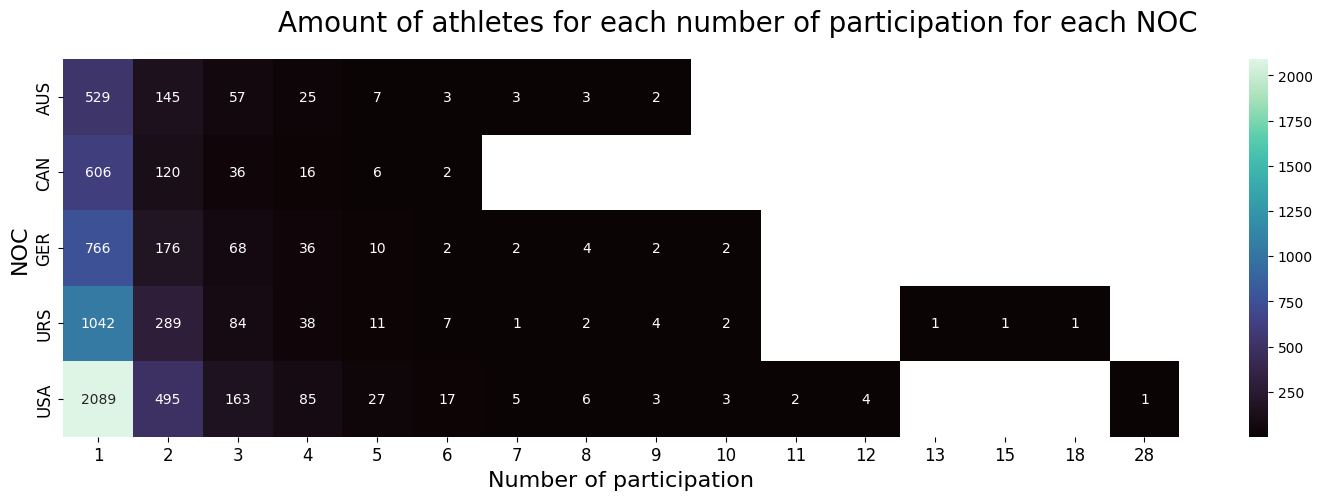

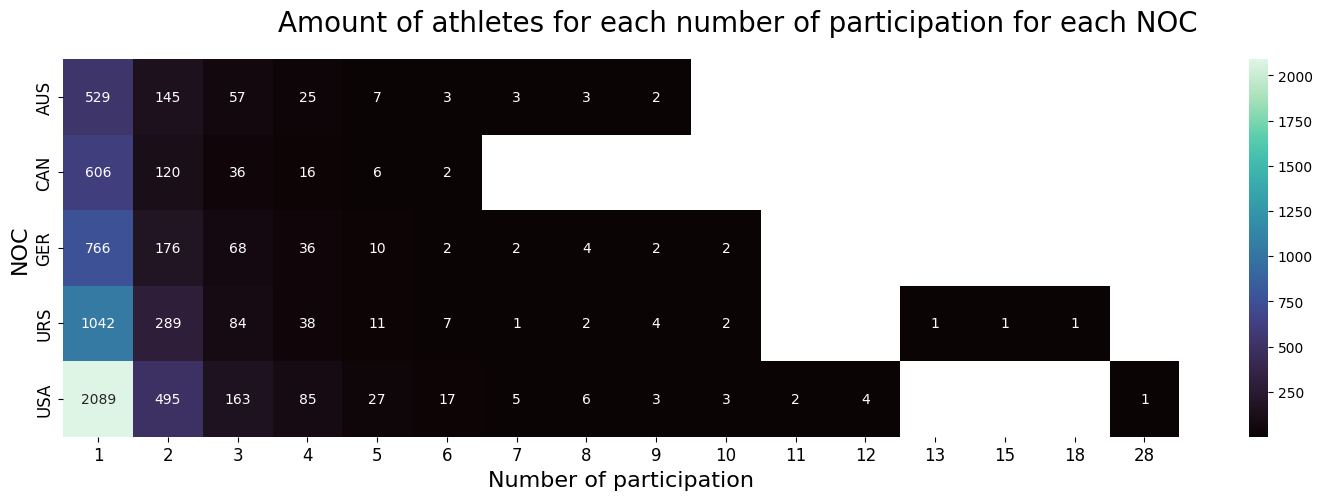

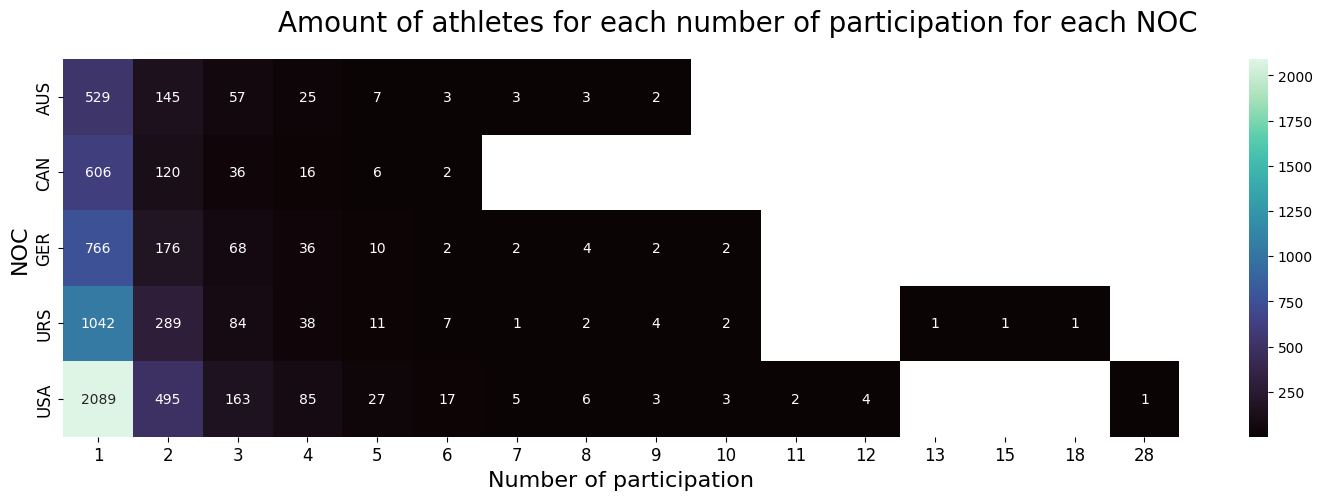

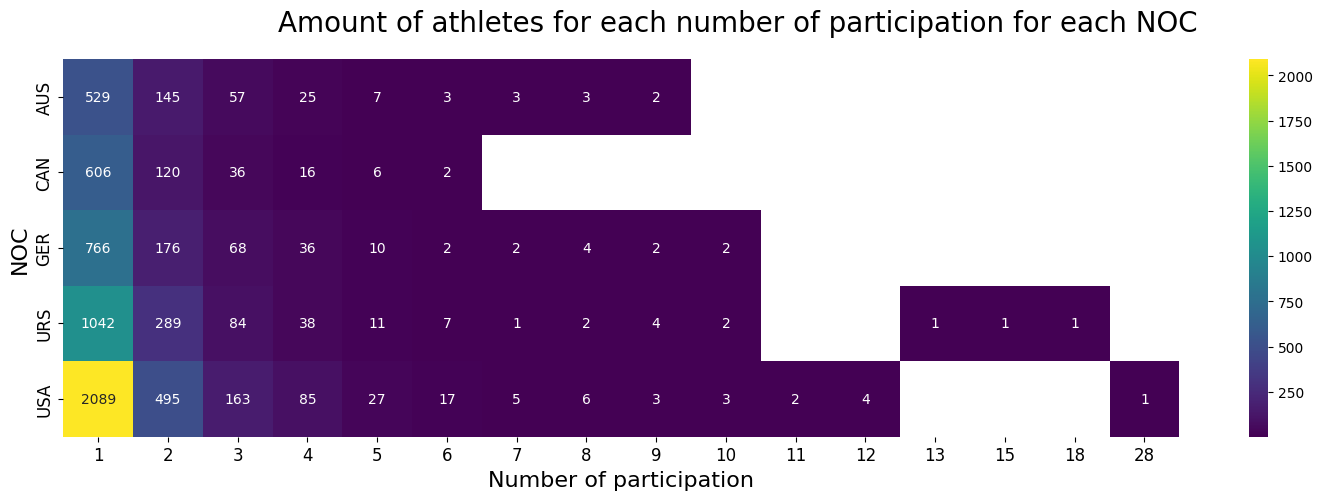

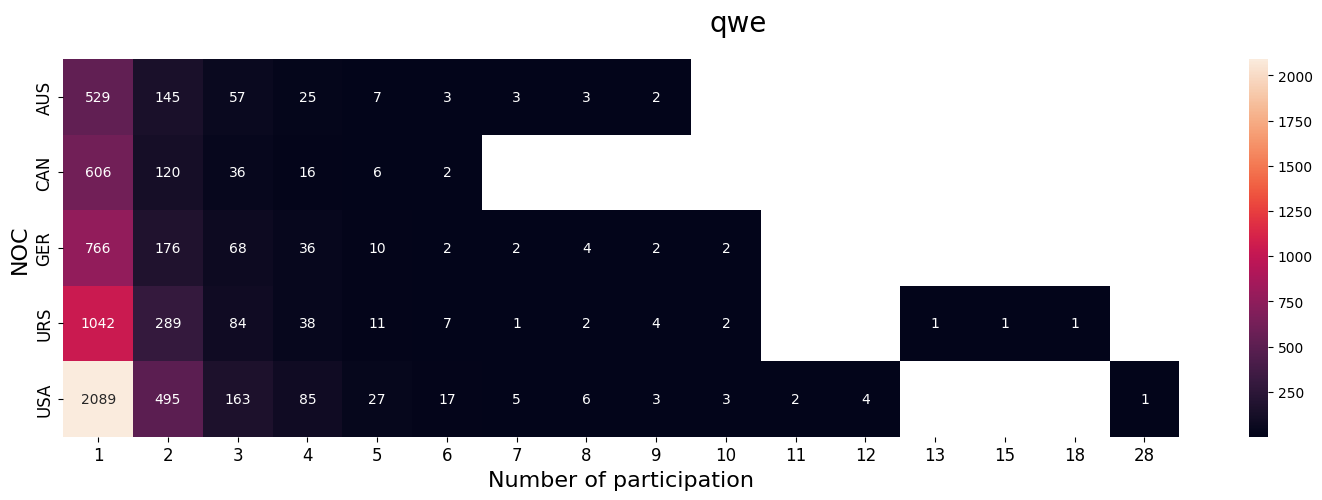

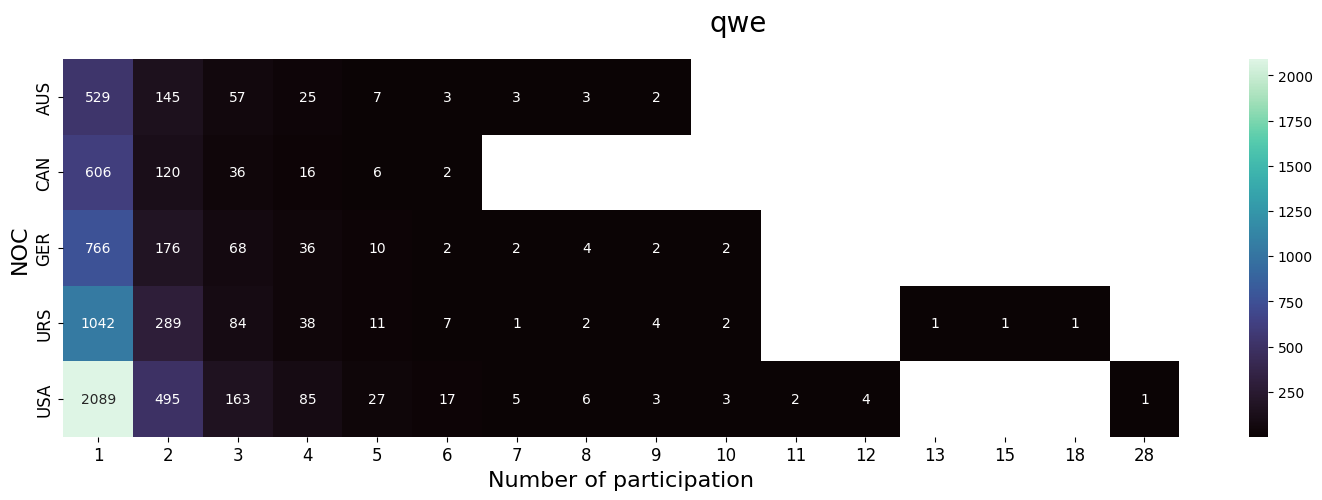

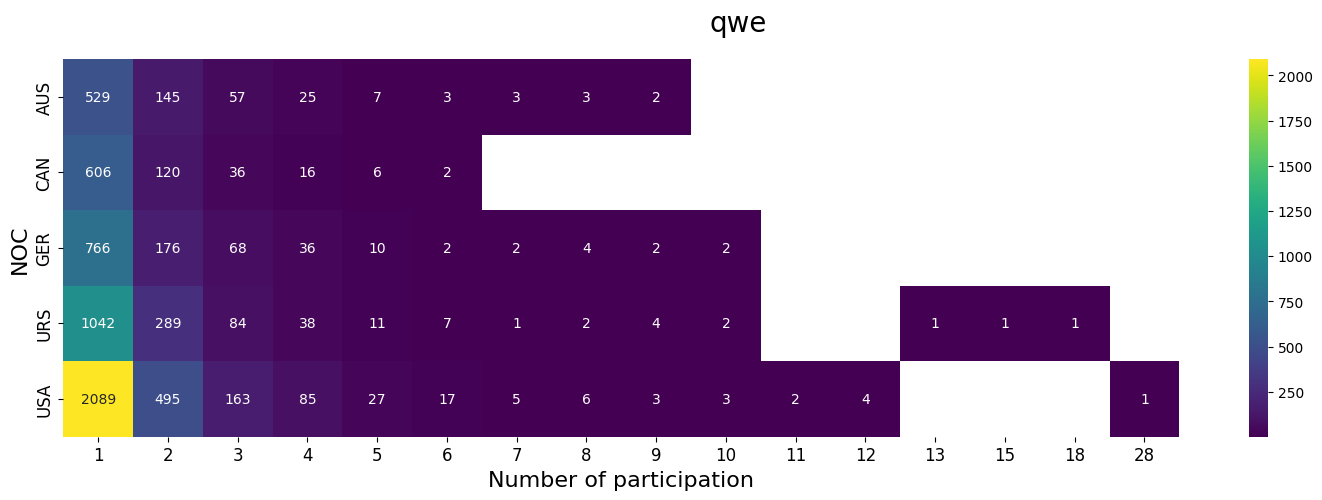

In [114]:
from PIL import ImageTk, Image
from time import sleep
from functools import partial

root = tk.Tk()
root.title('Plot 3')
root.geometry("1600x800")

# plot1_title
plot3_title = tk.Label(
    root,
    text="Plot 3",
    fg="#262F56",
    font=("Futura Hv BT", 30)
)

plot3_title.pack(
    ipady=20,
    fill='x'
)

# Plot functions

title = 'Amount of athletes for each number of participation for each NOC'

def plot(color_scheme = 'rocket'):
    global title
    fig, ax = plt.subplots(figsize=(18,5), dpi=100)
    fig.suptitle(title, fontsize=20)
    result_plot_3 = sns.heatmap(result_3.reset_index().pivot(index='NOC', columns='Number of participations', values='Amount of athletes'), annot=True, fmt='g', cmap=color_scheme)
    result_plot_3.set_xticklabels(result_plot_3.get_xmajorticklabels(), fontsize = 12)
    result_plot_3.set_yticklabels(result_plot_3.get_ymajorticklabels(), fontsize = 12)
    plt.xlabel('Number of participation', size=16)
    plt.ylabel('NOC', size=16)
    plt.savefig('plot_3.png')

def choose_color_scheme(color):
    plot(color)
    sleep(1.5)
    image = ImageTk.PhotoImage(Image.open("plot_3.png"))
    plot3_plot.configure(image=image)


def generate_plot():
    global plot3_plot, plot3_plot_frame, title
    title = plot3_change_title.get(1.0, "end-1c")
    plot()
    sleep(1.5)
    image = ImageTk.PhotoImage(Image.open("plot_3.png"))
    plot3_plot.configure(image=image)

# Entry frame

plot3_entry_frame = tk.Frame(root)

plot3_change_title_label = tk.Label(
    plot3_entry_frame,
    text="Change title",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot3_change_color_scheme = tk.Label(
    plot3_entry_frame,
    text="Change color scheme",
    fg="#262F56",
    font=("Futura Hv BT", 20)
)

plot3_change_title= tk.Text(plot3_entry_frame, height=1, width=15, font=("Futura Hv BT", 20), fg="#262F56")
plot3_button = tk.Button(plot3_entry_frame, text='Go!', font=("Futura Hv BT", 16), bg="#262F56", fg='#FFF', command=generate_plot)
plot3_button_color_rocket = tk.Button(plot3_entry_frame, text='Rocket', font=("Futura Hv BT", 16), bg="#eb6134", fg='#FFF', command=partial(choose_color_scheme, 'rocket'))
plot3_button_color_mako = tk.Button(plot3_entry_frame, text='Mako', font=("Futura Hv BT", 16), bg="#05ebc8", fg='#FFF', command=partial(choose_color_scheme, 'mako'))
plot3_button_color_viridis = tk.Button(plot3_entry_frame, text='Viridis', font=("Futura Hv BT", 16), bg="#82de12", fg='#FFF', command=partial(choose_color_scheme, 'viridis'))
plot3_change_title_label.grid(row=0, column=0)
plot3_change_color_scheme.grid(row=0, column=3, padx = 5)
plot3_change_title.grid(row=1, column=0)
plot3_button.grid(row=1, column=1, padx = 15)
plot3_button_color_rocket.grid(row=1, column=2)
plot3_button_color_mako.grid(row=1, column=3)
plot3_button_color_viridis.grid(row=1, column=4)

plot3_entry_frame.pack()

# PLot frame

plot3_plot_frame = tk.Frame(root, pady=20)
plot()

img = ImageTk.PhotoImage(Image.open("plot_3.png"))
plot3_plot = tk.Label(plot3_plot_frame, image = img)
plot3_plot.pack()

plot3_plot_frame.pack(fill='x')


root.mainloop()